In [1]:
import numpy as np
import pygrad as pg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [2]:

n_samples = 1000
n_features = 2

X = np.random.randn(n_samples, n_features)

# Generate labels based on a linear model with some added noise
true_weights = np.random.randn(n_features)
true_bias = np.random.randn()
linear_combination = np.dot(X, true_weights) + true_bias
probabilities = 1 / (1 + np.exp(-linear_combination))  # Logistic function
y = (np.random.rand(n_samples) < probabilities).astype('int')

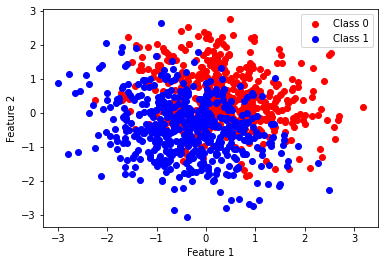

In [3]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
def logistic(z):
    return (pg.exp(-z) + 1)**(-1)

def model(X, weights, bias):
    z = X @ weights + bias
    return logistic(z)

In [5]:
# Initialize parameters
weights = pg.zeros(n_features, requires_grad=True)
bias = pg.zeros(1, requires_grad=True)
learning_rate = 0.01
num_epochs = 101
batch_size = 50

In [6]:
loss_fn = pg.nn.BCELoss()
#optimizer = pg.optim.Adam(model.parameters(), weight_decay=0.001)
optimizer = pg.optim.SGD([weights, bias], momentum=0.9)

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
n_train = len(X_train)

training_losses = []
validation_losses = []

X_test = pg.Tensor(X_test)
y_test = pg.Tensor(y_test)

# Training loop
for epoch in range(1, num_epochs+1):
    # Shuffle the dataset at the beginning of each epoch
    indices = np.arange(n_train)
    np.random.shuffle(indices)
    X_shuffled = X_train[indices]
    y_shuffled = y_train[indices]

    epoch_loss = 0
    for i in range(0, n_train, batch_size):
        # Mini-batch
        X_batch = pg.Tensor(X_shuffled[i:i + batch_size])
        y_batch = pg.Tensor(y_shuffled[i:i + batch_size])

        # Forward pass
        y_pred = model(X_batch, weights, bias)

        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        epoch_loss += loss

        # Backward pass
        loss.backward()

        # Update weights and bias
        optimizer.step()
        optimizer.zero_grad()

     # Compute average training loss for the epoch
    training_losses.append(epoch_loss.numpy() / (len(X_shuffled) / batch_size))

    # Compute validation loss
    y_pred_val = model(X_test, weights, bias)
    val_loss = loss_fn(y_pred_val, y_test)
    validation_losses.append(val_loss.numpy())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Training Loss: {training_losses[-1]}, Validation Loss: {validation_losses[-1]}")

Epoch 10, Training Loss: [0.59146849], Validation Loss: [0.59681158]
Epoch 20, Training Loss: [0.53373602], Validation Loss: [0.54524578]
Epoch 30, Training Loss: [0.50267316], Validation Loss: [0.51683172]
Epoch 40, Training Loss: [0.48424968], Validation Loss: [0.49958819]
Epoch 50, Training Loss: [0.47243681], Validation Loss: [0.48858862]
Epoch 60, Training Loss: [0.46453358], Validation Loss: [0.48104843]
Epoch 70, Training Loss: [0.45907588], Validation Loss: [0.47571851]
Epoch 80, Training Loss: [0.45511227], Validation Loss: [0.47191705]
Epoch 90, Training Loss: [0.45223185], Validation Loss: [0.4690989]
Epoch 100, Training Loss: [0.45005079], Validation Loss: [0.46695647]


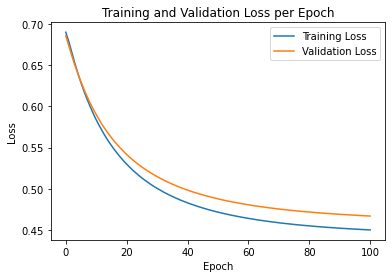

In [9]:
# Plotting the training and validation loss
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.show()

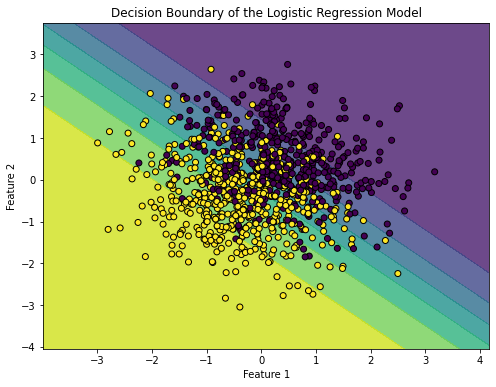

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict values across the grid
grid = pg.Tensor(np.c_[xx.ravel(), yy.ravel()])
probs = model(grid, weights, bias).reshape(xx.shape)

# Plot the decision boundary using contourf
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs.numpy(), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the Logistic Regression Model')
plt.show()